In [78]:
"""
En este jupyter notebook dejate las databases que voy a usar en mi presentacion (hare capturas) y mas o menos el orden que he seguido para la realizacion del EDA.
La primera dificultad ha sido encontrar la informacion relacionada, encontrar las bases de datos de las ventas me llevo alguna que otra busqueda en Kaggle hasta que la encontre.
Como es hasta 2016, me sirve perfecto para ver las ventas ANTES del lanzamiento de Monster Hunter World.
Tambien esta la saga souls, por lo que me sirve como aprox para lo que ha sido el lanzamiento de Elden Ring.
"""

'\nEn este jupyter notebook dejate las databases que voy a usar en mi presentacion (hare capturas) y mas o menos el orden que he seguido para la realizacion del EDA.\nLa primera dificultad ha sido encontrar la informacion relacionada, encontrar las bases de datos de las ventas me llevo alguna que otra busqueda en Kaggle hasta que la encontre.\nComo es hasta 2016, me sirve perfecto para ver las ventas ANTES del lanzamiento de Monster Hunter World.\nTambien esta la saga souls, por lo que me sirve como aprox para lo que ha sido el lanzamiento de Elden Ring.\n'

In [79]:
#Primero hablaremos sobre monster Hunter, para ello, vamos a importar las bases de datos.

In [80]:
#usaremos estas dos librerias
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
MH_df = pd.read_csv("../Datos procesados/Ventas Monster Hunter todas plataformas.csv")
MH3DS_df = pd.read_csv("../Datos procesados/Ventas Monster 3DS.csv")
MHX360_df = pd.read_csv("../Datos procesados/Ventas Monster X360.csv")
MHPSP_df = pd.read_csv("../Datos procesados/Ventas Monster PSP.csv")
MHPS2_df = pd.read_csv("../Datos procesados/Ventas Monster PS2.csv")
MHWii_df = pd.read_csv("../Datos procesados/Ventas Monster Wii.csv")
MHPS3_df = pd.read_csv("../Datos procesados/Ventas Monster PS3.csv")
MHWiiU_df = pd.read_csv("../Datos procesados/Ventas Monster WiiU.csv")
ventas_globales = pd.read_csv("../Datos procesados/Ventas globales por plataforma Monster Hunter.csv")

In [82]:
#Coloco el sum de cada una, lo guardamos en un diccionario por comodidad.

lista_ventas = {}
lista_ventas["3DS"] = MH3DS_df["Global_Sales"].sum()
lista_ventas["X360"] = MHX360_df["Global_Sales"].sum()
lista_ventas["PSP"] = round(MHPSP_df["Global_Sales"].sum(),2)
lista_ventas["PS2"] = round(MHPS2_df["Global_Sales"].sum(),2)
lista_ventas["Wii"] = MHWii_df["Global_Sales"].sum()
lista_ventas["PS3"] = MHPS3_df["Global_Sales"].sum()
lista_ventas["WiiU"] = MHWiiU_df["Global_Sales"].sum()
lista_ventas

ventas_globales = pd.DataFrame(lista_ventas.items(),columns=["Plataforma","Ventas_Globales"])
ventas_globales

,Plataforma,Ventas_Globales
0,3DS,13.72
1,X360,0.26
2,PSP,14.26
3,PS2,1.36
4,Wii,2.47
5,PS3,0.55
6,WiiU,0.69


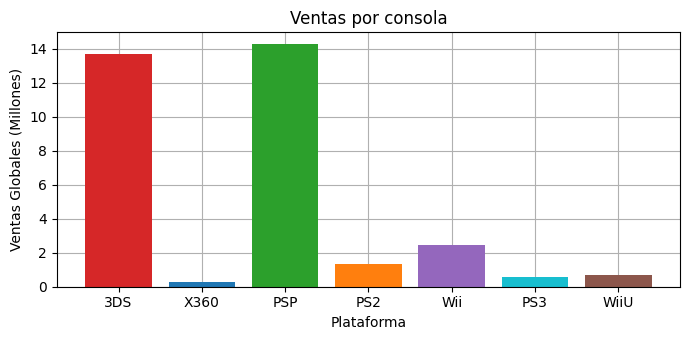

In [83]:
#usamos en este caso PLT para mostrar
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (10, 4)

ventas = lista_ventas.values()
plataformas = lista_ventas.keys()
bar_labels = ['3DS', 'X360', 'PSP', 'PS2', "Wii","PS3","WiiU"]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange','tab:purple','tab:cyan','tab:brown']


ax.bar(plataformas, ventas, label=bar_labels, color=bar_colors,zorder=2,edgecolor=None)

ax.set_ylabel('Ventas Globales (Millones)')
ax.set_xlabel("Plataforma")
ax.set_title('Ventas por consola')
ax.grid(zorder=3)

plt.show();

In [84]:
#Con esto visto, ya podemos irnos a la vida de jugadores de world, aqui dejare la grafica hecha, en la presentacion habra mas contenido.

In [85]:
jugadores_MHW = pd.read_csv("../Datos procesados/Ventas Monster vida jugadores.csv")

In [86]:
#Se nos ha colado el anterior index, lo borro y listo
jugadores_MHW = jugadores_MHW.drop(["Unnamed: 0"], axis=1)

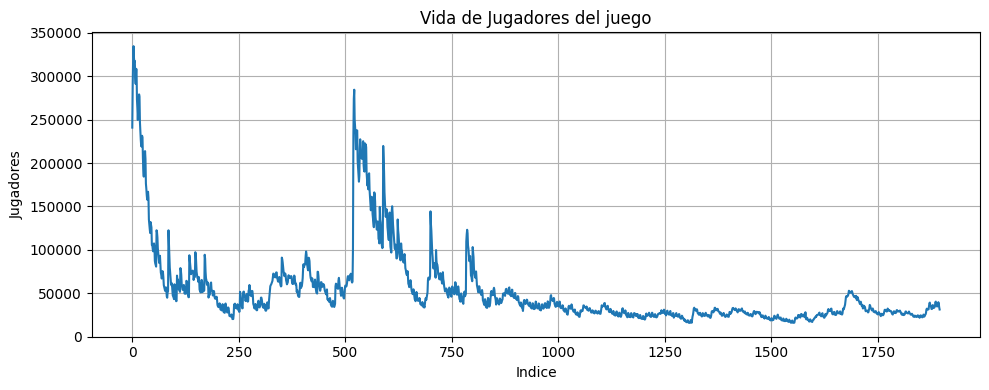

In [87]:
jugadores_MHW.plot(legend=False, title="Vida de Jugadores del juego", ylabel="Jugadores", xlabel="Indice", grid="seaborn-white");

In [88]:
#vamos a ver ese pico alto, de cuando es:

jugadores_MHW[jugadores_MHW["Players"] > 250000].tail(4)

#Si buscamos en google, esta subida se debio al DLC de Iceborne, sacado el 09/01/2020 en PC

,DateTime,Players
17,2018-08-26 00:00:00,276164.0
520,2020-01-11 00:00:00,274114.0
521,2020-01-12 00:00:00,284524.0
522,2020-01-13 00:00:00,250113.0


In [89]:
jugadores_LA = pd.read_csv("../Datos procesados/Lost Ark vida jugadores.csv")
jugadores_LA = jugadores_LA.drop(["Unnamed: 0","Average Players"], axis=1)
jugadores_LA["Players"] = jugadores_LA["Players"].astype(int)
jugadores_LA

,DateTime,Players
0,2022-02-08 00:00:00,532476
1,2022-02-09 00:00:00,506946
2,2022-02-10 00:00:00,507123
3,2022-02-11 00:00:00,688736
4,2022-02-12 00:00:00,1325305
...,...,...
613,2023-10-14 00:00:00,51541
614,2023-10-15 00:00:00,48581
615,2023-10-16 00:00:00,45089
616,2023-10-17 00:00:00,41800


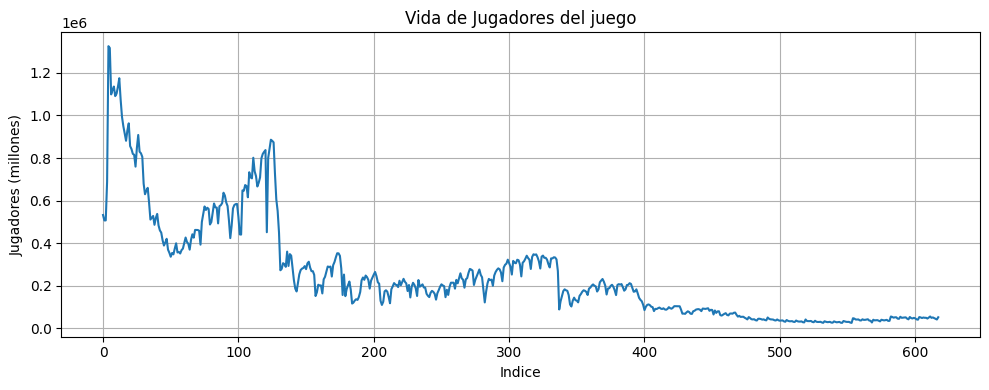

In [90]:
jugadores_LA.plot(title="Vida de Jugadores del juego", ylabel="Jugadores (millones)", xlabel="Indice",grid="seaborne-white",legend=False);

In [91]:
#Buscando en google: pongo literalmente "Lost Ark Lost Players"
#salta noticia: "Lost Ark Loses Two Thirds Of Players After Bot Bans" con fecha del 12 de enero de 2023.
#vamos a filtrar por menos de 100K jugadores en nuerstra dataframe
#Usaremos los indexes de la grafica para situarnos.
jugadores_LA[jugadores_LA["Players"] < 100000]

,DateTime,Players
337,2023-01-11 00:00:00,88972
400,2023-03-15 00:00:00,85847
406,2023-03-21 00:00:00,99872
407,2023-03-22 00:00:00,81377
408,2023-03-23 00:00:00,91792
...,...,...
613,2023-10-14 00:00:00,51541
614,2023-10-15 00:00:00,48581
615,2023-10-16 00:00:00,45089
616,2023-10-17 00:00:00,41800


In [92]:
#La primera es del 01-11, o sea 11 de enero.
#Esa caida tan brusca, se debio a que habia un total de 200k bots.
#Vemos que luego hay datos del 03-15 y de ahi ya continuan...

In [93]:
jugadores_LA.iloc[395:]

,DateTime,Players
395,2023-03-10 00:00:00,164439
396,2023-03-11 00:00:00,143495
397,2023-03-12 00:00:00,134072
398,2023-03-13 00:00:00,127417
399,2023-03-14 00:00:00,110921
...,...,...
613,2023-10-14 00:00:00,51541
614,2023-10-15 00:00:00,48581
615,2023-10-16 00:00:00,45089
616,2023-10-17 00:00:00,41800


In [94]:
#En mi opinion, esto es un claro ejemplo de como una mala gestion y el abuso de bots, puede cargarse un juego.

In [95]:
#terminemos con Elden Ring

jugadores_ER = pd.read_csv("../Datos procesados/Elden Ring vida jugadores.csv")
jugadores_ER = jugadores_ER.drop(["Unnamed: 0"], axis=1)

In [96]:
#De Elden Ring, solo destacar su lanzamiento, tambien un monton de jugadores.
#Lo curioso, al ser multijugador, pero sin contenido constante como es un MMO, tiene mas jugadores que lost ark.

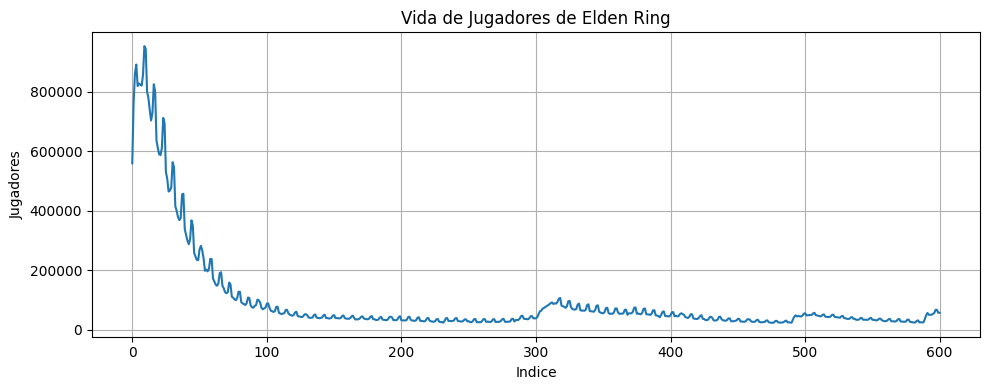

In [97]:
jugadores_ER.plot(title="Vida de Jugadores de Elden Ring", ylabel="Jugadores", xlabel="Indice", legend=False, grid="seaborne-white");

In [98]:
# Los tres graficos juntos.

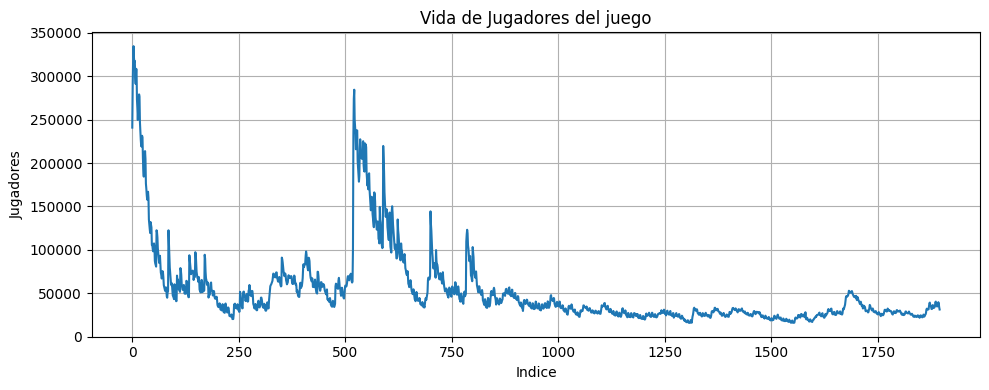

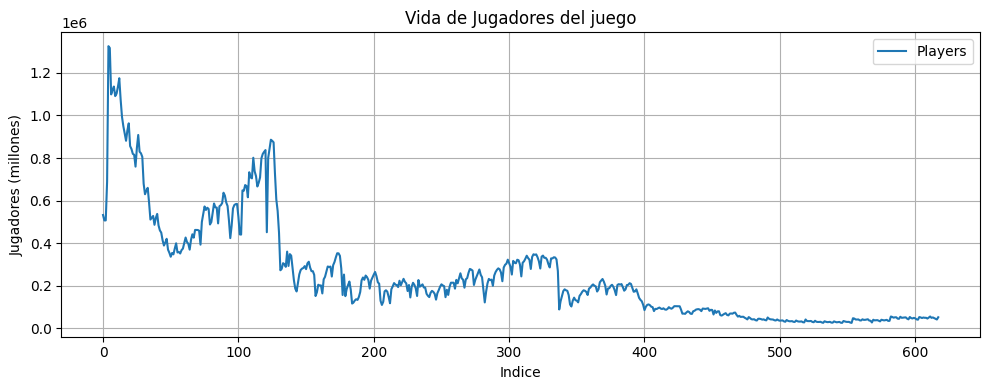

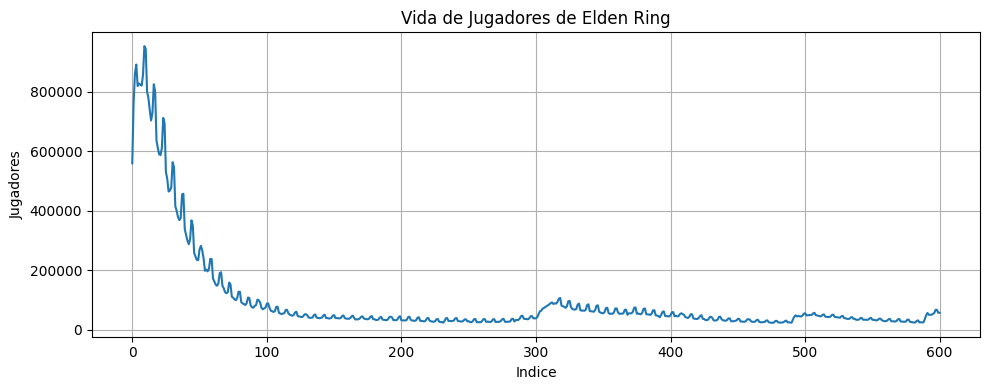

In [105]:
jugadores_MHW.plot(legend=False, title="Vida de Jugadores del juego", ylabel="Jugadores", xlabel="Indice", grid="seaborn-white");
jugadores_LA.plot(title="Vida de Jugadores del juego", ylabel="Jugadores (millones)", xlabel="Indice",grid="seaborne-white");
jugadores_ER.plot(title="Vida de Jugadores de Elden Ring", ylabel="Jugadores", xlabel="Indice", legend=False, grid="seaborne-white");

In [ ]:
#por ultimo, las estadisticias segun steamDB del Monster Hunter World, sacadas a traves de web scrapping con Selenium

In [106]:
stats = pd.read_csv("../Datos procesados/stats MHW SteamDB.csv")
stats = stats.drop(["Unnamed: 0"], axis=1)

In [109]:
stats

,stats
0,"24,748 players live on Steam"
1,"35,022 24-hour peak"
2,"334,684 all-time peak 5 years ago"
3,637 viewers right now
4,"3,691 24-hour peak"
5,"169,921 all-time peak 6 years ago"
6,"813,299 followers"
7,#106 in top sellers
8,"340,488 positive reviews"
9,"52,915 negative reviews"
